### Walmart Store Location Data

Walmart operates thousands of stores. Efficient warehouse placement reduces delivery time and cost. Using data of store locations, I want to select ideal warehouse locations using KMeans clustering because it is simple and interpretable. 

This will not take into account geo-specific factors. No will it place weights such us revenue or number of orders in the features because they are not available in the data.
It is a simple model based on longitude and latitude

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv(r'walmart_store_locaction.csv')  


In [141]:
df.head()

,name,url,street_address,city,state,zip_code,country,phone_number_1,phone_number_2,fax_1,...,email_2,website,open_hours,latitude,longitude,facebook,twitter,instagram,pinterest,youtube
0,Conway Supercenter,https://www.walmart.com/store/5/conway-ar/details,1155 Hwy 65 North,Conway,AR,72032,US,501-329-0023,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",35.108660,-92.436905,NaN,NaN,NaN,NaN,NaN
1,Sikeston Supercenter,https://www.walmart.com/store/9/sikeston-mo/de...,1303 S Main St,Sikeston,MO,63801,US,573-472-3020,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.857394,-89.586051,NaN,NaN,NaN,NaN,NaN
2,Tahlequah Supercenter,https://www.walmart.com/store/10/tahlequah-ok/...,2020 S Muskogee Ave,Tahlequah,OK,74464,US,918-456-8804,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",35.888765,-94.979859,NaN,NaN,NaN,NaN,NaN
3,Mountain Home Supercenter,https://www.walmart.com/store/11/mountain-home...,65 Wal Mart Dr,Mountain Home,AR,72653,US,870-492-9299,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.354957,-92.341026,NaN,NaN,NaN,NaN,NaN
4,Claremore Supercenter,https://www.walmart.com/store/12/claremore-ok/...,1500 S Lynn Riggs Blvd,Claremore,OK,74017,US,918-341-2765,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.293955,-95.627125,NaN,NaN,NaN,NaN,NaN


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            4654 non-null   object 
 1   url             4654 non-null   object 
 2   street_address  4654 non-null   object 
 3   city            4654 non-null   object 
 4   state           4654 non-null   object 
 5   zip_code        4654 non-null   int64  
 6   country         4654 non-null   object 
 7   phone_number_1  4654 non-null   object 
 8   phone_number_2  0 non-null      float64
 9   fax_1           0 non-null      float64
 10  fax_2           0 non-null      float64
 11  email_1         0 non-null      float64
 12  email_2         0 non-null      float64
 13  website         0 non-null      float64
 14  open_hours      4631 non-null   object 
 15  latitude        4654 non-null   float64
 16  longitude       4654 non-null   float64
 17  facebook        0 non-null      f

In [143]:
df.describe()

,zip_code,phone_number_2,fax_1,fax_2,email_1,email_2,website,latitude,longitude,facebook,twitter,instagram,pinterest,youtube
count,4654.000000,0.0,0.0,0.0,0.0,0.0,0.0,4654.000000,4654.000000,0.0,0.0,0.0,0.0,0.0
mean,52986.716373,NaN,NaN,NaN,NaN,NaN,NaN,36.524560,-91.642538,NaN,NaN,NaN,NaN,NaN
std,26161.877445,NaN,NaN,NaN,NaN,NaN,NaN,5.196190,13.684058,NaN,NaN,NaN,NaN,NaN
min,617.000000,NaN,NaN,NaN,NaN,NaN,NaN,17.980275,-159.365025,NaN,NaN,NaN,NaN,NaN
25%,31640.250000,NaN,NaN,NaN,NaN,NaN,NaN,33.026880,-97.167386,NaN,NaN,NaN,NaN,NaN
50%,50242.500000,NaN,NaN,NaN,NaN,NaN,NaN,36.236837,-88.482037,NaN,NaN,NaN,NaN,NaN
75%,76017.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.388978,-81.754850,NaN,NaN,NaN,NaN,NaN
max,99901.000000,NaN,NaN,NaN,NaN,NaN,NaN,64.856378,-65.674169,NaN,NaN,NaN,NaN,NaN


Checking for duplicates

In [144]:
df['name'].value_counts().reset_index().sort_values(by='count', ascending=False)

,name,count
0,San Antonio Supercenter,23
1,Houston Supercenter,20
2,Jacksonville Supercenter,18
3,Springfield Supercenter,14
4,Dallas Supercenter,14
...,...,...
1514,Richland Hills Neighborhood Market,1
1515,Concord Neighborhood Market,1
1516,New Caney Supercenter,1
1517,Huntersville Supercenter,1


In [145]:
df[df['name'] == 'San Antonio Supercenter']

,name,url,street_address,city,state,zip_code,country,phone_number_1,phone_number_2,fax_1,...,email_2,website,open_hours,latitude,longitude,facebook,twitter,instagram,pinterest,youtube
723,San Antonio Supercenter,https://www.walmart.com/store/765/san-antonio-...,16503 Nacogdoches Rd,San Antonio,TX,78247,US,210-646-6077,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",29.591760,-98.355813,NaN,NaN,NaN,NaN,NaN
954,San Antonio Supercenter,https://www.walmart.com/store/999/san-antonio-...,7239 Sw Loop 410,San Antonio,TX,78242,US,210-247-5905,NaN,NaN,...,NaN,NaN,"monday - friday : 06:00-24:00, saturday : 06:0...",29.358837,-98.634755,NaN,NaN,NaN,NaN,NaN
1144,San Antonio Supercenter,https://www.walmart.com/store/1198/san-antonio...,1515 N Loop 1604 E,San Antonio,TX,78232,US,210-491-0291,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-23:59, saturday : 00:0...",29.612400,-98.470700,NaN,NaN,NaN,NaN,NaN
1179,San Antonio Supercenter,https://www.walmart.com/store/1235/san-antonio...,5025 Nw Loop 410,San Antonio,TX,78229,US,210-523-1091,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",29.490115,-98.587588,NaN,NaN,NaN,NaN,NaN
1255,San Antonio Supercenter,https://www.walmart.com/store/1313/san-antonio...,1200 Se Military Dr,San Antonio,TX,78214,US,210-921-0800,NaN,NaN,...,NaN,NaN,"monday - friday : 06:00-24:00, saturday : 06:0...",29.352859,-98.479915,NaN,NaN,NaN,NaN,NaN
1293,San Antonio Supercenter,https://www.walmart.com/store/1347/san-antonio...,1430 Austin Hwy,San Antonio,TX,78209,US,210-637-1700,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",29.490162,-98.437450,NaN,NaN,NaN,NaN,NaN
1737,San Antonio Supercenter,https://www.walmart.com/store/1803/san-antonio...,4331 Thousand Oaks Drive,San Antonio,TX,78217,US,210-591-4977,NaN,NaN,...,NaN,NaN,"monday - friday : 06:00-24:00, saturday : 06:0...",29.553351,-98.406975,NaN,NaN,NaN,NaN,NaN
2142,San Antonio Supercenter,https://www.walmart.com/store/2239/san-antonio...,8923 W Military Dr,San Antonio,TX,78245,US,210-675-5092,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",29.442669,-98.642424,NaN,NaN,NaN,NaN,NaN
2275,San Antonio Supercenter,https://www.walmart.com/store/2404/san-antonio...,8500 Jones Maltsberger Rd,San Antonio,TX,78216,US,210-377-1899,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",29.514823,-98.481846,NaN,NaN,NaN,NaN,NaN
2445,San Antonio Supercenter,https://www.walmart.com/store/2599/san-antonio...,5555 De Zavala Rd,San Antonio,TX,78249,US,210-558-2007,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",29.564468,-98.596047,NaN,NaN,NaN,NaN,NaN


Looking at the data for San Antonio, it seems they are no duplicates as each shop has different phone phone numbers, zip code, and geo-location. But is it the same for all the others? I will create a different df for these suspected duplicates and investigate further

In [146]:
duplicates = df['name'].value_counts().reset_index().sort_values(by='count', ascending=False)
duplicates = duplicates[duplicates['count'].astype(int) > 1]
duplicates = list(duplicates.name)
duplicates


['San Antonio Supercenter',
 'Houston Supercenter',
 'Jacksonville Supercenter',
 'Springfield Supercenter',
 'Dallas Supercenter',
 'Orlando Neighborhood Market',
 'Phoenix Supercenter',
 'Columbus Supercenter',
 'Columbia Supercenter',
 'Las Vegas Supercenter',
 'Greenville Supercenter',
 'Washington Supercenter',
 'El Paso Neighborhood Market',
 'Lexington Supercenter',
 'Richmond Supercenter',
 'Louisville Supercenter',
 'Fayetteville Supercenter',
 'Fort Worth Supercenter',
 'Madison Supercenter',
 'Aurora Supercenter',
 'Salem Supercenter',
 'Tampa Supercenter',
 'Orlando Supercenter',
 'El Paso Supercenter',
 'Tucson Neighborhood Market',
 'Austin Supercenter',
 'Las Vegas Neighborhood Market',
 'Cleveland Supercenter',
 'Oklahoma City Supercenter',
 'Lebanon Supercenter',
 'Oklahoma City Neighborhood Market',
 'Albuquerque Supercenter',
 'Tucson Supercenter',
 'Cincinnati Supercenter',
 'Springfield Neighborhood Market',
 'Nashville Supercenter',
 'Clinton Supercenter',
 'Roche

In [147]:
duplicates_df = df[df['name'].isin(duplicates)]
duplicates_df

,name,url,street_address,city,state,zip_code,country,phone_number_1,phone_number_2,fax_1,...,email_2,website,open_hours,latitude,longitude,facebook,twitter,instagram,pinterest,youtube
0,Conway Supercenter,https://www.walmart.com/store/5/conway-ar/details,1155 Hwy 65 North,Conway,AR,72032,US,501-329-0023,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",35.108660,-92.436905,NaN,NaN,NaN,NaN,NaN
3,Mountain Home Supercenter,https://www.walmart.com/store/11/mountain-home...,65 Wal Mart Dr,Mountain Home,AR,72653,US,870-492-9299,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.354957,-92.341026,NaN,NaN,NaN,NaN,NaN
5,Carthage Supercenter,https://www.walmart.com/store/13/carthage-mo/d...,2705 Grand Ave,Carthage,MO,64836,US,417-358-3000,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",37.141958,-94.313292,NaN,NaN,NaN,NaN,NaN
6,Rogers Supercenter,https://www.walmart.com/store/1/rogers-ar/details,2110 W Walnut St,Rogers,AR,72756,US,479-636-3222,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",36.331300,-94.149024,NaN,NaN,NaN,NaN,NaN
8,Lebanon Supercenter,https://www.walmart.com/store/14/lebanon-mo/de...,1800 S Jefferson Ave,Lebanon,MO,65536,US,417-588-2268,NaN,NaN,...,NaN,NaN,"monday - friday : 00:00-24:00, saturday : 00:0...",37.663493,-92.645849,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,Madison Neighborhood Market,https://www.walmart.com/store/7342/madison-al/...,7140 Wall Triana Highway,Madison,AL,35757,US,256-970-6193,NaN,NaN,...,NaN,NaN,"monday - friday : 06:00-24:00, saturday : 06:0...",34.793292,-86.750837,NaN,NaN,NaN,NaN,NaN
4645,Cypress Neighborhood Market,https://www.walmart.com/store/7357/cypress-tx/...,8208 Barker Cypress Rd,Cypress,TX,77433,US,281-500-7990,NaN,NaN,...,NaN,NaN,"monday - friday : 06:00-23:00, saturday : 06:0...",29.897944,-95.683197,NaN,NaN,NaN,NaN,NaN
4646,Amarillo Neighborhood Market,https://www.walmart.com/store/7362/amarillo-tx...,2035 Se 34th Ave,Amarillo,TX,79118,US,806-513-6390,NaN,NaN,...,NaN,NaN,"monday - friday : 06:00-24:00, saturday : 06:0...",35.179619,-101.815380,NaN,NaN,NaN,NaN,NaN
4648,Amarillo Neighborhood Market,https://www.walmart.com/store/7349/amarillo-tx...,7251 Arden Rd,Amarillo,TX,79109,US,806-513-6238,NaN,NaN,...,NaN,NaN,"monday - friday : 06:00-24:00, saturday : 06:0...",35.130745,-101.919062,NaN,NaN,NaN,NaN,NaN


Looking at the combination of store name, zip code and telephone number to catch duplicates

In [148]:
duplicates_df['key'] = duplicates_df[['name', 'zip_code', 'phone_number_1']].astype(str).agg('-'.join, axis=1)


duplicates_df.key.value_counts().reset_index().sort_values(by='count', ascending=False)

/var/folders/jh/cmy96w8x08vdjgfkk7pkrvk00000gn/T/ipykernel_3799/1443391179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates_df['key'] = duplicates_df[['name', 'zip_code', 'phone_number_1']].astype(str).agg('-'.join, axis=1)


,key,count
0,Conway Supercenter-72032-501-329-0023,1
1490,Mexico Supercenter-65265-573-581-4500,1
1484,Bolivar Supercenter-65613-417-326-8424,1
1485,Jefferson City Supercenter-65109-573-635-8283,1
1486,Farmington Supercenter-63640-573-756-8448,1
...,...,...
738,San Angelo Neighborhood Market-76904-325-276-6621,1
737,Norman Neighborhood Market-73071-405-515-7418,1
736,Sarasota Neighborhood Market-34233-941-554-2353,1
735,Huntsville Supercenter-35811-256-716-6773,1


Clearly, there are no duplicates. Some stores have the same name but are in different zip codes and have different phone numbers

Building Clustering Model using KMeans

In [149]:
# Prepare data (use lat/long as features)
X = df[['latitude', 'longitude']].dropna().values  

# Scale features (important for geographic data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Finding ideal number of clusters using the Elbow Technique

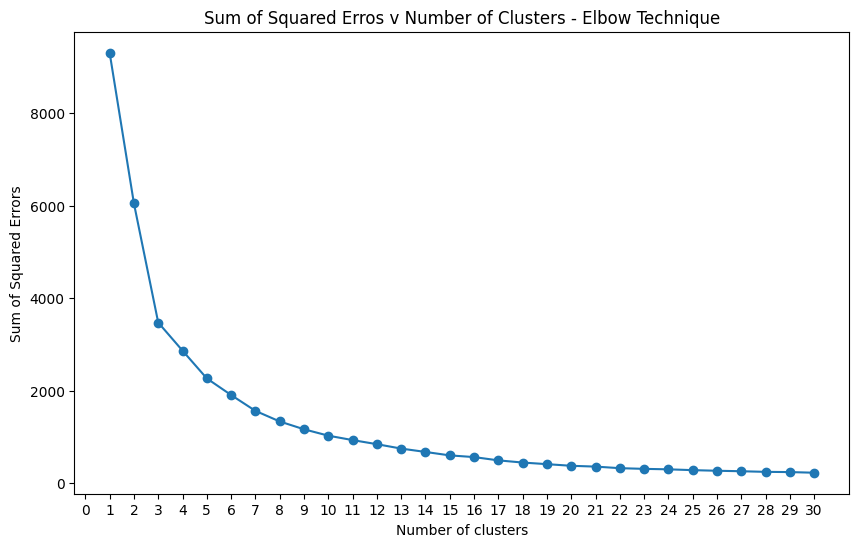

In [150]:
k_range = range(1,31)
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    prediction = kmeans.fit(X_scaled)
    sse.append(prediction.inertia_)

ax, fig = plt.subplots(figsize=(10,6))
plt.plot(k_range, sse, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Errors")
plt.xticks(np.arange(0,31, step=1))
plt.title("Sum of Squared Erros v Number of Clusters - Elbow Technique")
plt.show()

Based on the ELBOW technique i have chosen 8 clusters as the optimum value.

### Running a silhouette score

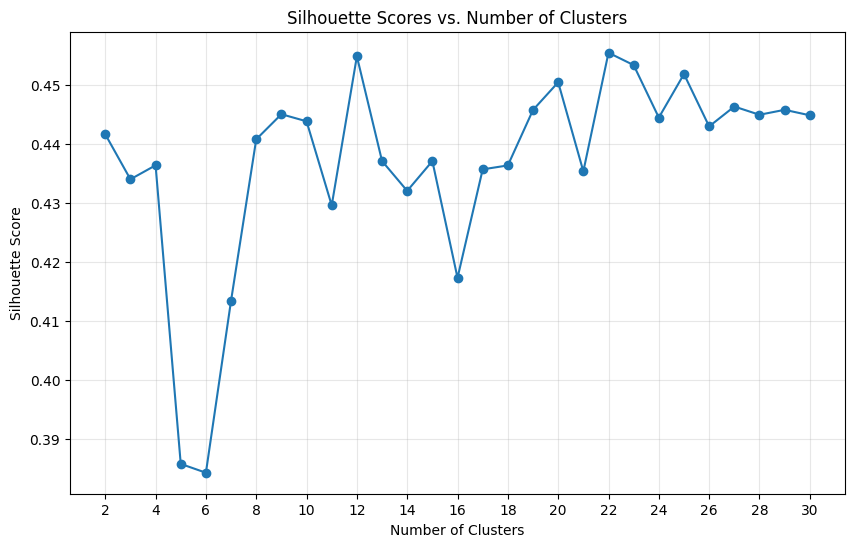

In [151]:
from sklearn.metrics import silhouette_score
sil_scores = []
for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 31), sil_scores, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores vs. Number of Clusters")
plt.xticks(range(2, 31, 2))
plt.grid(True, alpha=0.3)
plt.show()

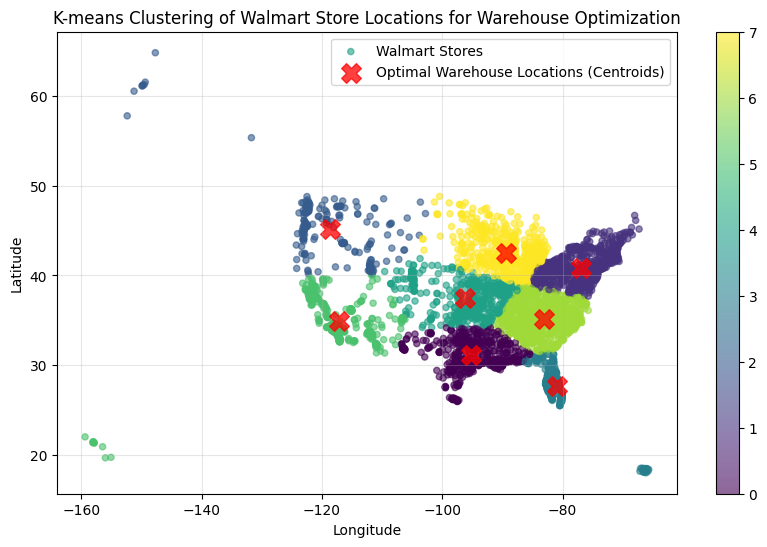

Cluster Centers (Potential Warehouse Coords):
Cluster 1: Lat 31.1361, Long -95.2705
Cluster 2: Lat 40.8526, Long -76.8920
Cluster 3: Lat 45.2143, Long -118.7183
Cluster 4: Lat 27.6111, Long -80.9208
Cluster 5: Lat 37.4748, Long -96.1928
Cluster 6: Lat 34.8983, Long -117.1220
Cluster 7: Lat 35.1723, Long -83.1275
Cluster 8: Lat 42.5469, Long -89.4167


In [152]:
# Step 4: Apply K-means (using 8 clusters per the elbow technique)
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Step 5: Plot (unscale centroids for visualization)
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 1], X[:, 0], c=y_kmeans, s=20, cmap='viridis', alpha=0.6, label='Walmart Stores')
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=200, alpha=0.75, marker='X', label='Optimal Warehouse Locations (Centroids)')
plt.colorbar(scatter)
plt.title('K-means Clustering of Walmart Store Locations for Warehouse Optimization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Optional: Print cluster insights
print("Cluster Centers (Potential Warehouse Coords):")
for i, center in enumerate(centers):
    print(f"Cluster {i+1}: Lat {center[0]:.4f}, Long {center[1]:.4f}")

Printing Cluster Sizes

In [153]:
pd.Series(y_kmeans).value_counts().sort_index()

0    751
1    719
2    222
3    347
4    591
5    481
6    948
7    595
Name: count, dtype: int64

In [154]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X_scaled, y_kmeans))

0.44078621100350845


Using 12 clusters based on the silhouette score

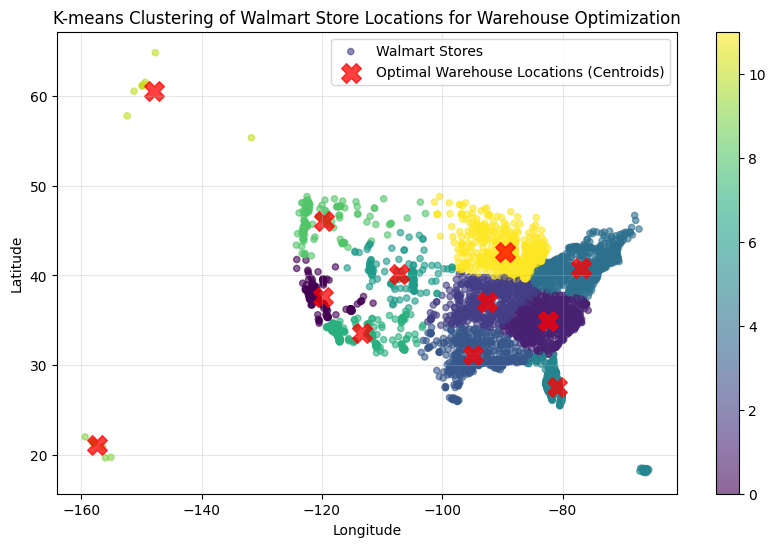

Cluster Centers (Potential Warehouse Coords):
Cluster 1: Lat 37.5545, Long -119.8274
Cluster 2: Lat 34.8643, Long -82.4953
Cluster 3: Lat 37.0655, Long -92.5851
Cluster 4: Lat 31.0944, Long -94.8269
Cluster 5: Lat 40.8168, Long -76.9355
Cluster 6: Lat 27.5408, Long -80.8635
Cluster 7: Lat 40.1722, Long -107.1768
Cluster 8: Lat 33.5619, Long -113.3745
Cluster 9: Lat 46.0595, Long -119.7073
Cluster 10: Lat 21.0392, Long -157.4668
Cluster 11: Lat 60.5589, Long -147.9326
Cluster 12: Lat 42.6547, Long -89.4964


In [155]:
# Step 4: Apply K-means (using 12 clusters per the silhouetter score)
kmeans = KMeans(n_clusters=12, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Step 5: Plot (unscale centroids for visualization)
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 1], X[:, 0], c=y_kmeans, s=20, cmap='viridis', alpha=0.6, label='Walmart Stores')
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=200, alpha=0.75, marker='X', label='Optimal Warehouse Locations (Centroids)')
plt.colorbar(scatter)
plt.title('K-means Clustering of Walmart Store Locations for Warehouse Optimization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Optional: Print cluster insights
print("Cluster Centers (Potential Warehouse Coords):")
for i, center in enumerate(centers):
    print(f"Cluster {i+1}: Lat {center[0]:.4f}, Long {center[1]:.4f}")

In [156]:
pd.Series(y_kmeans).value_counts().sort_index()

0     185
1     820
2     620
3     723
4     730
5     340
6     178
7     318
8     147
9      10
10      9
11    574
Name: count, dtype: int64

In [157]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X_scaled, y_kmeans))

0.45486090373630017


What if customer intends to build 20 Warehouses, how would it look like?

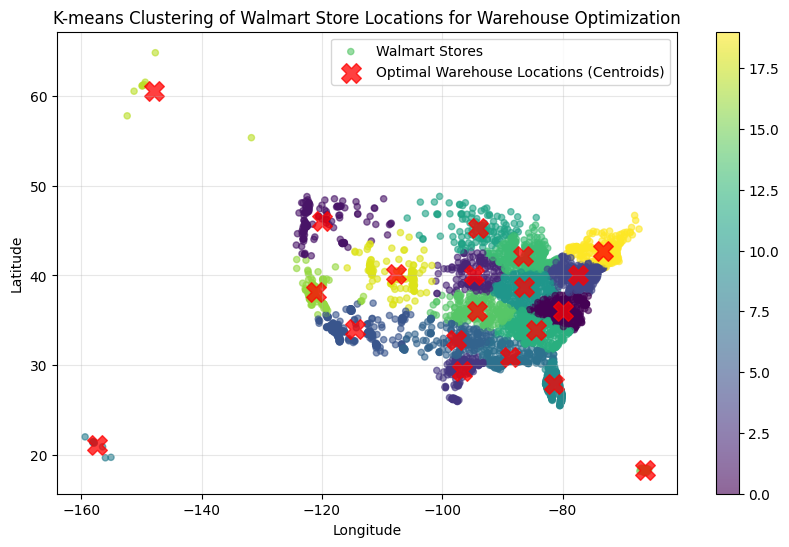

Cluster Centers (Potential Warehouse Coords):
Cluster 1: Lat 36.0491, Long -79.8570
Cluster 2: Lat 46.0365, Long -120.0329
Cluster 3: Lat 40.0968, Long -94.6555
Cluster 4: Lat 29.2986, Long -96.7753
Cluster 5: Lat 39.9978, Long -77.3608
Cluster 6: Lat 33.9810, Long -114.4319
Cluster 7: Lat 32.7913, Long -97.7477
Cluster 8: Lat 30.8656, Long -88.6873
Cluster 9: Lat 21.0392, Long -157.4668
Cluster 10: Lat 27.8296, Long -81.4730
Cluster 11: Lat 38.6750, Long -86.3622
Cluster 12: Lat 45.2452, Long -94.0006
Cluster 13: Lat 33.9409, Long -84.4394
Cluster 14: Lat 42.2093, Long -86.5467
Cluster 15: Lat 36.0366, Long -94.2758
Cluster 16: Lat 18.2807, Long -66.3134
Cluster 17: Lat 38.1069, Long -120.9362
Cluster 18: Lat 60.5589, Long -147.9326
Cluster 19: Lat 40.1058, Long -107.6918
Cluster 20: Lat 42.6721, Long -73.2507


In [158]:
# Step 4: Apply K-means (e.g., 5 clusters for regional warehouses)
kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Step 5: Plot (unscale centroids for visualization)
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 1], X[:, 0], c=y_kmeans, s=20, cmap='viridis', alpha=0.6, label='Walmart Stores')
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=200, alpha=0.75, marker='X', label='Optimal Warehouse Locations (Centroids)')
plt.colorbar(scatter)
plt.title('K-means Clustering of Walmart Store Locations for Warehouse Optimization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Optional: Print cluster insights
print("Cluster Centers (Potential Warehouse Coords):")
for i, center in enumerate(centers):
    print(f"Cluster {i+1}: Lat {center[0]:.4f}, Long {center[1]:.4f}")

### Recommendation:
based on the silhouette scoreand the elbow technique, I would recommend 12 or 8 warehouses serving clusters of stores. Mind you we do not have transportation cost, number of orders and revenue to furthr help us with decision making. This is a simple illustration to show how clustering can aid in logistical decision making